In [4]:
# -*- coding: utf-8 -*-
"""
Created on Sun Oct 17 22:59:07 2021
@author: mackt
"""

"""Plot unemployment and inflation data from FRED."""



import datetime as dt
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use('ggplot')


#Here we want to keep it simple
#Load some unemployment and inflation data, plot them
#See where it takes me, but keeping it simple.
        
# CPI https://fred.stlouisfed.org/series/CPIAUCSL
# Unemp: https://fred.stlouisfed.org/series/UNRATE
# Inflation: calculated as pct_change() of CPI

start = dt.datetime(2010, 1, 1)
end = dt.datetime(2021, 9, 30)



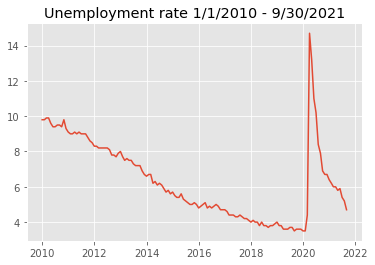

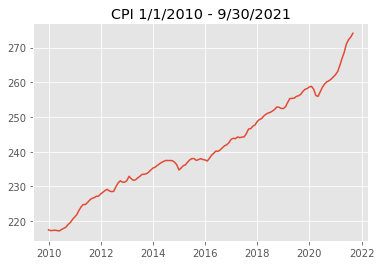

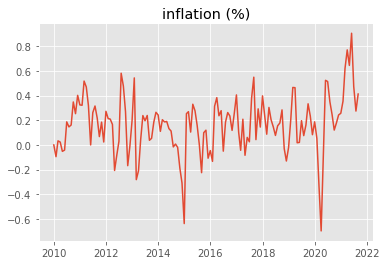

In [5]:
#Unemployment - note the fred code is the first argument
unemp_rate = pdr.DataReader('UNRATE', 'fred', start = start, end = end)
plt.plot(unemp_rate)
plt.title('Unemployment rate 1/1/2010 - 9/30/2021')
plt.show()

#CPI
cpi = pdr.DataReader('CPIAUCSL', 'fred', start = start, end = end)
plt.plot(cpi)
plt.title('CPI 1/1/2010 - 9/30/2021')
plt.show()


#Inflation is the percentage change in CPI
inflation = cpi.pct_change().replace(np.NaN, 0).mul(100)
plt.plot(inflation)
plt.title('inflation (%)')
plt.show()


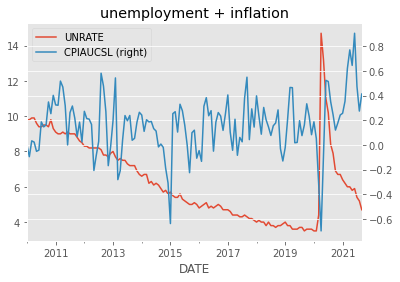

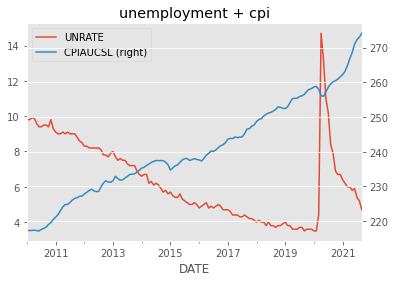

In [6]:
#Let's plot now both cpi / inflation with unemp_rate
ax1 = unemp_rate.plot()
inflation.plot(ax = ax1, secondary_y = True, title = 'unemployment + inflation')
plt.show()

ax2 = unemp_rate.plot()
cpi.plot(ax = ax2, secondary_y = True, title = 'unemployment + cpi')
plt.show()



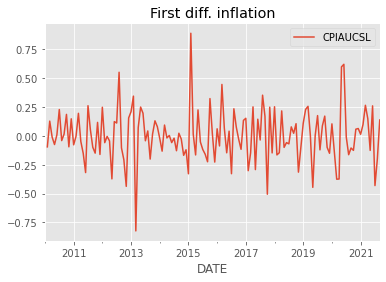

In [7]:
#Is it a statioanry time series? Seasonal?
inf_diff1 = inflation.diff()
inf_diff1.plot(title = 'First diff. inflation')
plt.show()


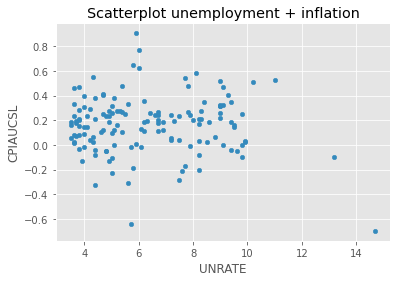

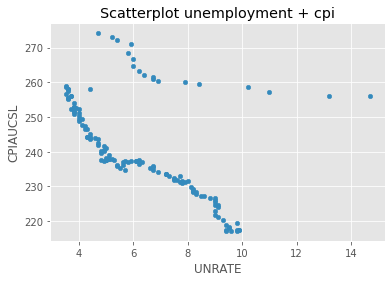

In [8]:
#Inflation and unemployment scatterplot
infl_unemp = pd.merge_ordered(inflation, unemp_rate, on = inflation.index, how = 'inner')
infl_unemp.plot(x = 'UNRATE', y = 'CPIAUCSL', kind = 'scatter')
plt.title('Scatterplot unemployment + inflation')
plt.show()

#cpi and uinemployment scatterplot
cpi_unemp = pd.merge_ordered(cpi, unemp_rate, on = cpi.index, how = 'inner')
cpi_unemp.plot(x = 'UNRATE', y = 'CPIAUCSL', kind = 'scatter')
plt.title('Scatterplot unemployment + cpi')
plt.show()

#What the F Kind of plot is that!?!

#The Inflation unemployment plot is sensible, thet CPI plot is not, maybe due to scaling


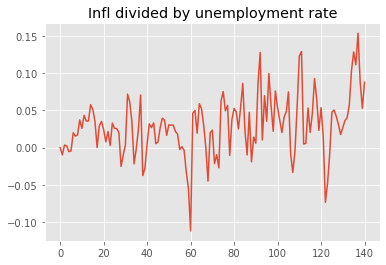

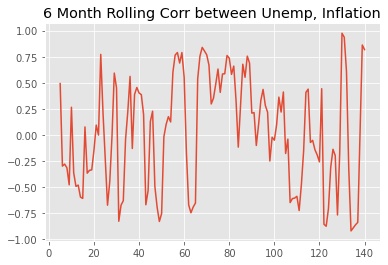

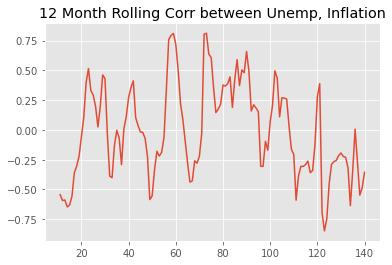

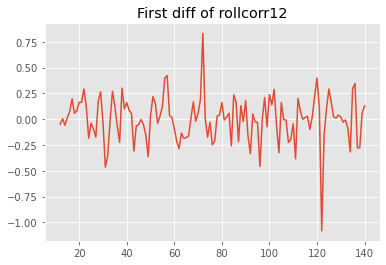

In [9]:
#The inflation plot looks good so let's get unemployment inflation correlation over time

#Renamed inflation and unemployment rate columns for typing

infl_unemp.rename(columns={'CPIAUCSL': 'inflation', 'UNRATE': 'unemp'}, inplace = True)
infl_unemp['inflation'].div(infl_unemp['unemp']).plot()
plt.title('Infl divided by unemployment rate')
plt.show()

#Rolling 6 month corr
infl_unemp['rollcorr6'] = infl_unemp['unemp'].rolling(6).corr(infl_unemp['inflation'])
infl_unemp['rollcorr6'].plot(
    title = '6 Month Rolling Corr between Unemp, Inflation')
plt.show()

#Rolling 12 month corr
infl_unemp['rollcorr12'] = infl_unemp['unemp'].rolling(12).corr(infl_unemp['inflation'])
infl_unemp['rollcorr12'].plot(
    title = '12 Month Rolling Corr between Unemp, Inflation')
plt.show()

#Differencing plots
infl_unemp['rollcorr12'].diff().plot()
plt.title('First diff of rollcorr12')
plt.show()